## 1. Import Required Libraries


In [ ]:
# Import all required libraries for data analysis, modeling, and visualization
import pandas as pd, numpy as np, warnings

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

# Preprocessing and pipeline utilities
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Evaluation metrics
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve, average_precision_score, precision_recall_fscore_support, precision_score, recall_score

# Visualization libraries
import matplotlib.pyplot as plt, seaborn as sns

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

## 2. Load South German Credit Dataset

In [ ]:
# Define column names as per dataset documentation
column_names = ['Status_Checking_Account', 'Duration_Months', 'Credit_History', 'Purpose', 'Credit_Amount', 'Savings_Account', 'Employment_Since', 'Installment_Rate', 'Gender_Status', 'Other_Debtors', 'Residence_Years', 'Property', 'Age', 'Other_Installments', 'Housing', 'Existing_Credits', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker', 'Credit_Risk']

# Load the dataset from local file
df = pd.read_csv('SouthGermanCredit.asc', delim_whitespace=True, header=0, names=column_names)

## 3. Exploratory Data Analysis (EDA)

In [ ]:
# Display the full dataframe to inspect the data
df

,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Gender_Status,Other_Debtors,...,Property,Age,Other_Installments,Housing,Existing_Credits,Job,Dependents,Telephone,Foreign_Worker,Credit_Risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [ ]:
# Show summary statistics for numerical columns
df.describe()

,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Gender_Status,Other_Debtors,...,Property,Age,Other_Installments,Housing,Existing_Credits,Job,Dependents,Telephone,Foreign_Worker,Credit_Risk
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,...,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.845000,1.404000,1.963000,0.700000
std,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,...,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,...,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,...,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000,1.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,...,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000
max,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,...,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,1.000000


In [ ]:
# Display data types for each column
df.dtypes

Status_Checking_Account    int64
Duration_Months            int64
Credit_History             int64
Purpose                    int64
Credit_Amount              int64
Savings_Account            int64
Employment_Since           int64
Installment_Rate           int64
Gender_Status              int64
Other_Debtors              int64
Residence_Years            int64
Property                   int64
Age                        int64
Other_Installments         int64
Housing                    int64
Existing_Credits           int64
Job                        int64
Dependents                 int64
Telephone                  int64
Foreign_Worker             int64
Credit_Risk                int64
dtype: object

In [ ]:
# Check for duplicate rows in the dataset
print("Number of duplicate rows:", df.duplicated().sum())
print("Dataset shape:", df.shape)
print("Unique rows:", df.shape[0] - df.duplicated().sum())

Number of duplicate rows: 0
Dataset shape: (1000, 21)
Unique rows: 1000


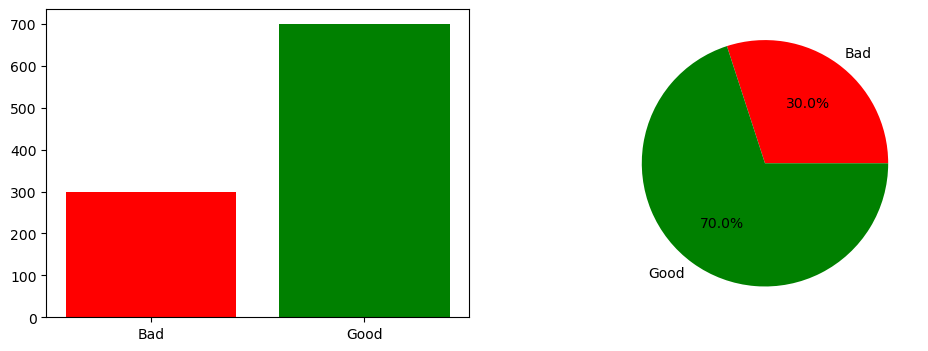

In [ ]:
# Visualize target variable distribution (Credit_Risk)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
counts = df['Credit_Risk'].value_counts().sort_index()
ax1.bar(['Bad', 'Good'], counts.values, color=['red', 'green'])
ax2.pie(counts.values, labels=['Bad', 'Good'], autopct='%1.1f%%', colors=['red', 'green'])
plt.show()

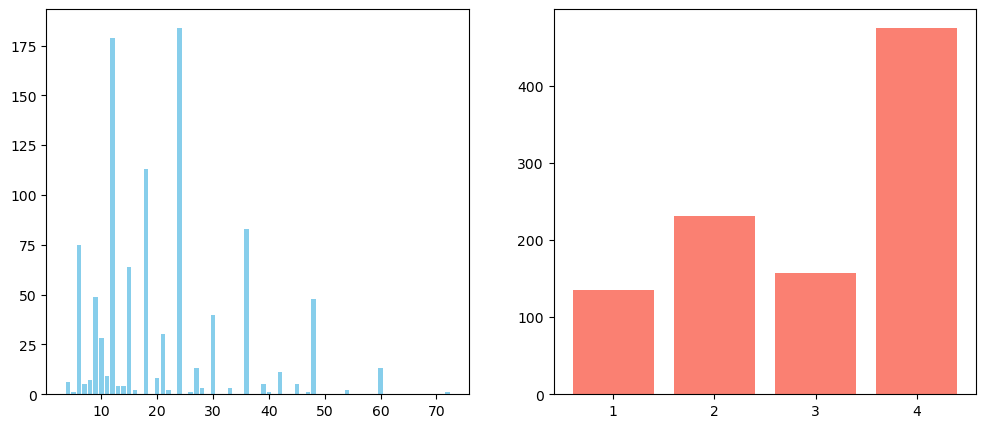

In [ ]:
# Visualize distributions of Duration_Months and Installment_Rate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.bar(df['Duration_Months'].value_counts().sort_index().index, df['Duration_Months'].value_counts().sort_index().values, color='skyblue')
ax2.bar(df['Installment_Rate'].value_counts().sort_index().index.astype(str), df['Installment_Rate'].value_counts().sort_index().values, color='salmon')
plt.show()

##  Handling Missing Values

Missing values per column:
Status_Checking_Account    0
Duration_Months            0
Credit_History             0
Purpose                    0
Credit_Amount              0
Savings_Account            0
Employment_Since           0
Installment_Rate           0
Gender_Status              0
Other_Debtors              0
Residence_Years            0
Property                   0
Age                        0
Other_Installments         0
Housing                    0
Existing_Credits           0
Job                        0
Dependents                 0
Telephone                  0
Foreign_Worker             0
Credit_Risk                0
dtype: int64


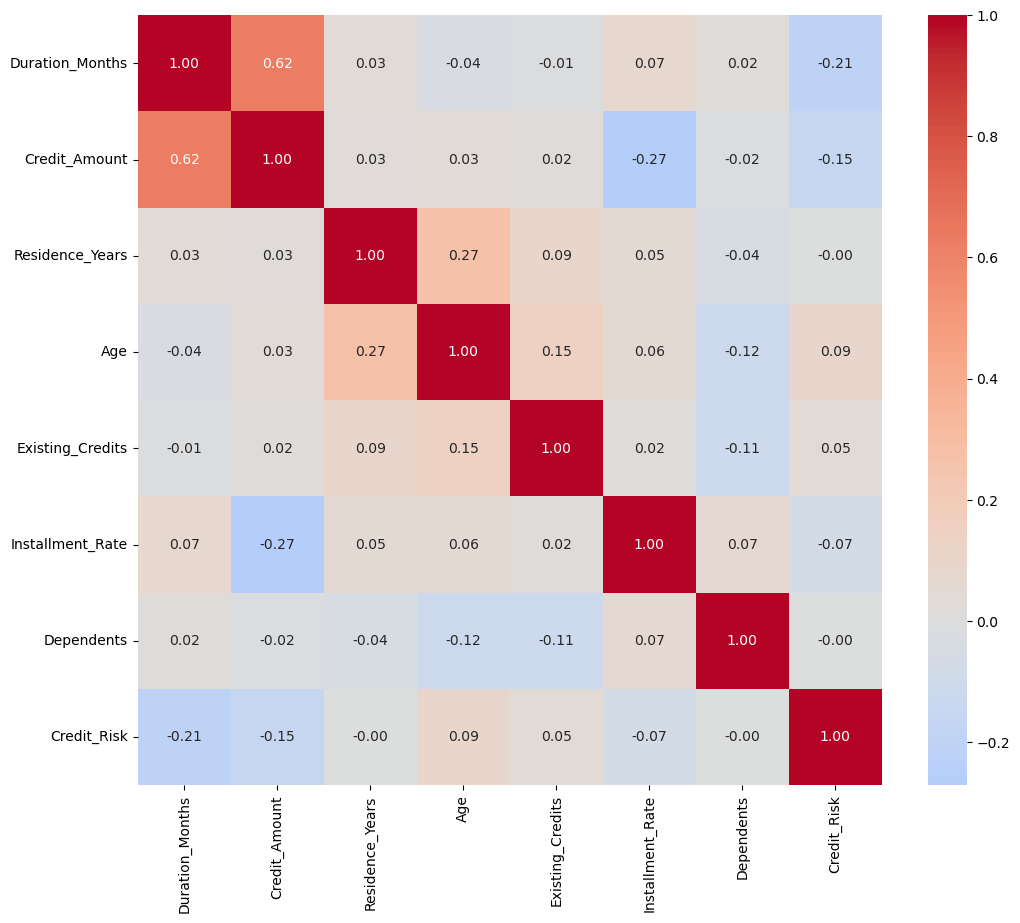

In [ ]:
# Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

# Plot correlation heatmap for selected numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df[['Duration_Months', 'Credit_Amount', 'Residence_Years', 'Age', 'Existing_Credits', 'Installment_Rate', 'Dependents', 'Credit_Risk']].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.show()

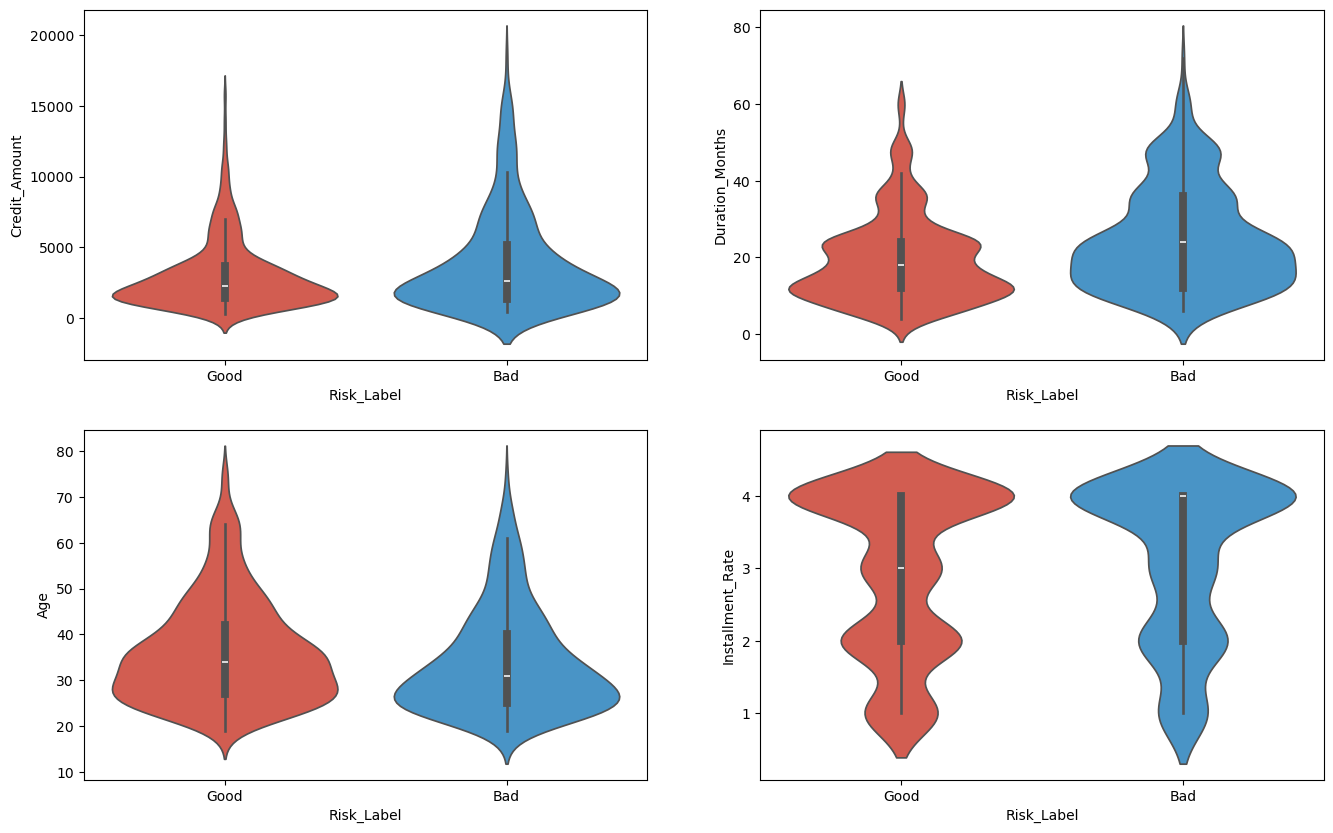

In [ ]:
# Violin plots to show feature distributions by target class
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
df_plot = df.copy()
df_plot['Risk_Label'] = df_plot['Credit_Risk'].map({0: 'Bad', 1: 'Good'})
for i, (ax, feature) in enumerate(zip(axes.flat, ['Credit_Amount', 'Duration_Months', 'Age', 'Installment_Rate'])):
    sns.violinplot(data=df_plot, x='Risk_Label', y=feature, ax=ax, palette=['#e74c3c', '#3498db'])
plt.show()

## 4. Data Preprocessing and Feature Engineering

## 4.1. Data Preprocessing with Engineered Features

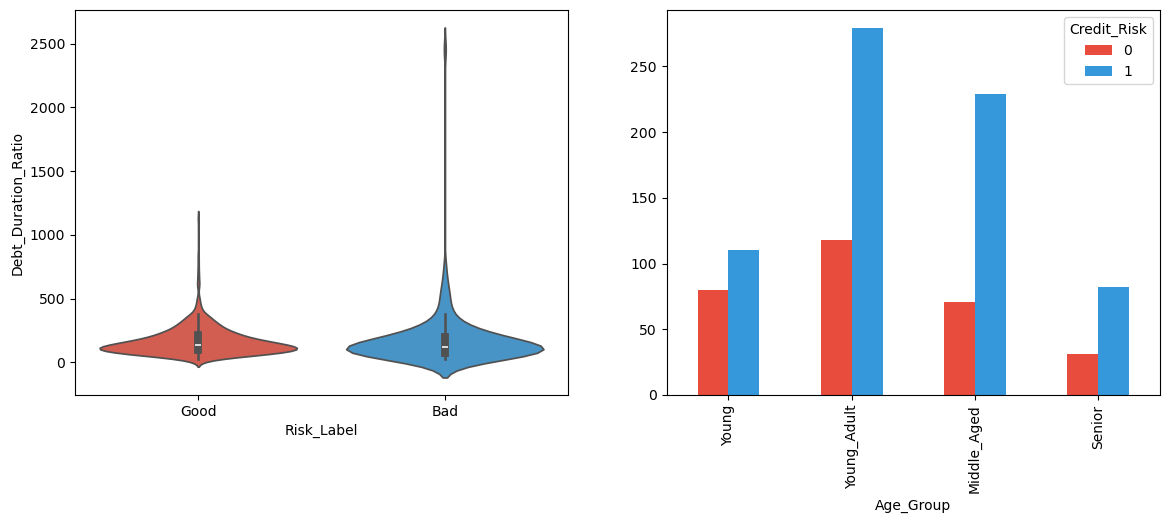

In [ ]:
# Feature engineering: create new features for modeling
df_engineered = df.copy()
df_engineered['Debt_Duration_Ratio'] = df_engineered['Credit_Amount'] / df_engineered['Duration_Months']
df_engineered['Age_Group'] = pd.cut(df_engineered['Age'], bins=[0, 25, 35, 50, 100], labels=['Young', 'Young_Adult', 'Middle_Aged', 'Senior'])
df_engineered['High_Installment'] = (df_engineered['Installment_Rate'] >= 3).astype(int)

# Visualize engineered features
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
df_plot_eng = df_engineered.copy()
df_plot_eng['Risk_Label'] = df_plot_eng['Credit_Risk'].map({0: 'Bad', 1: 'Good'})
sns.violinplot(data=df_plot_eng, x='Risk_Label', y='Debt_Duration_Ratio', ax=axes[0], palette=['#e74c3c', '#3498db'])
df_engineered.groupby(['Age_Group', 'Credit_Risk']).size().unstack().plot(kind='bar', ax=axes[1], color=['#e74c3c', '#3498db'])
plt.show()

## 4.2. Advanced Feature Engineering

Creating domain-specific features to capture better insights from the data.

In [ ]:
# Define continuous and categorical columns for preprocessing
continuous_cols = ['Duration_Months', 'Credit_Amount', 'Age']
categorical_cols = ['Status_Checking_Account', 'Credit_History', 'Purpose', 'Savings_Account', 'Employment_Since', 'Installment_Rate', 'Gender_Status', 'Other_Debtors', 'Residence_Years', 'Property', 'Other_Installments', 'Housing', 'Existing_Credits', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker']

# Split features and target
X, y = df.drop('Credit_Risk', axis=1), (df['Credit_Risk'] == 0).astype(int)

# Train-test split with stratification for balanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns between train and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Scale continuous features
scaler = StandardScaler()
X_train_final, X_test_final = X_train_encoded.copy(), X_test_encoded.copy()
X_train_final[continuous_cols] = scaler.fit_transform(X_train_encoded[continuous_cols])
X_test_final[continuous_cols] = scaler.transform(X_test_encoded[continuous_cols])

# Final train and test targets
y_train_final, y_test_final = y_train, y_test

In [ ]:
# Show info about the dataframe (columns, types, non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Status_Checking_Account  1000 non-null   int64
 1   Duration_Months          1000 non-null   int64
 2   Credit_History           1000 non-null   int64
 3   Purpose                  1000 non-null   int64
 4   Credit_Amount            1000 non-null   int64
 5   Savings_Account          1000 non-null   int64
 6   Employment_Since         1000 non-null   int64
 7   Installment_Rate         1000 non-null   int64
 8   Gender_Status            1000 non-null   int64
 9   Other_Debtors            1000 non-null   int64
 10  Residence_Years          1000 non-null   int64
 11  Property                 1000 non-null   int64
 12  Age                      1000 non-null   int64
 13  Other_Installments       1000 non-null   int64
 14  Housing                  1000 non-null   int64
 15  Exist

In [ ]:
# Display first few rows of the dataframe
df.head()

,Status_Checking_Account,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Account,Employment_Since,Installment_Rate,Gender_Status,Other_Debtors,...,Property,Age,Other_Installments,Housing,Existing_Credits,Job,Dependents,Telephone,Foreign_Worker,Credit_Risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
# Show data types for each column
df.dtypes

Status_Checking_Account    int64
Duration_Months            int64
Credit_History             int64
Purpose                    int64
Credit_Amount              int64
Savings_Account            int64
Employment_Since           int64
Installment_Rate           int64
Gender_Status              int64
Other_Debtors              int64
Residence_Years            int64
Property                   int64
Age                        int64
Other_Installments         int64
Housing                    int64
Existing_Credits           int64
Job                        int64
Dependents                 int64
Telephone                  int64
Foreign_Worker             int64
Credit_Risk                int64
dtype: object

### 5.1. Base Model Training

First, we train baseline versions of all models with reasonable default parameters.

###  Logistic Regression Model Training and Evaluation

1. **Initializing the Model:** Created the model using `LogisticRegression()` with hyperparameter tuning via `GridSearchCV`.
2. **Training:** Trained the model using `fit()` on the prepared training features and target labels.
3. **Making Predictions:** Used `predict()` and `predict_proba()` to determine the credit risk for the test dataset.
4. **Calculating Accuracy:** Used `accuracy_score()` and other metrics to compare predicted labels with actual test labels.

In [ ]:
# Logistic Regression with hyperparameter tuning
lr_grid = GridSearchCV(LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced'), 
                       {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['saga']}, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model to training data
lr_grid.fit(X_train_final, y_train_final)

# Get the best estimator and make predictions
lr_model = lr_grid.best_estimator_
y_pred_lr, y_pred_proba_lr = lr_model.predict(X_test_final), lr_model.predict_proba(X_test_final)[:, 1]

In [ ]:
# Decision Tree with hyperparameter tuning
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'),
                       {'max_depth': [2,3,4,5,6,7,8], 'min_samples_split': [5,10,15,20,30], 'min_samples_leaf': [3,5,10,15,20], 'criterion': ['gini','entropy'], 'max_features': ['sqrt','log2',None]}, cv=10, scoring='accuracy', n_jobs=-1)

# Fit the model
dt_grid.fit(X_train_final, y_train_final)

# Get predictions
dt_model = dt_grid.best_estimator_
y_pred_dt, y_pred_proba_dt = dt_model.predict(X_test_final), dt_model.predict_proba(X_test_final)[:, 1]

In [ ]:
# Random Forest with hyperparameter tuning
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42, class_weight='balanced', n_jobs=-1),
                       {'n_estimators': [100, 200], 'max_depth': [None, 5, 6], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'max_features': ['sqrt']}, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
rf_grid.fit(X_train_final, y_train_final)

# Get predictions
rf_model = rf_grid.best_estimator_
y_pred_rf, y_pred_proba_rf = rf_model.predict(X_test_final), rf_model.predict_proba(X_test_final)[:, 1]

Fitting 10 folds for each of 24 candidates, totalling 240 fits


In [ ]:
# XGBoost with randomized hyperparameter search
import time
xgb_random = RandomizedSearchCV(XGBClassifier(random_state=42, scale_pos_weight=2.33, objective='binary:logistic', eval_metric='logloss', tree_method='hist', verbosity=0),
                                {'n_estimators': [100, 200, 300, 500], 'max_depth': [3,4,5,6,7], 'learning_rate': [0.01,0.03,0.05,0.1,0.2], 'subsample': [0.7,0.8,0.9,1.0], 'colsample_bytree': [0.7,0.8,0.9,1.0], 'min_child_weight': [1,3,5], 'gamma': [0,0.1,0.2]}, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model and measure training time
start = time.time()
xgb_random.fit(X_train_final, y_train_final)

# Get best estimator and predictions
xgb_model = xgb_random.best_estimator_
y_pred, y_pred_proba = xgb_model.predict(X_test_final), xgb_model.predict_proba(X_test_final)[:, 1]

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
# Define features for ensemble pipeline
continuous_features = ['Duration_Months', 'Credit_Amount', 'Age']
categorical_features = ['Status_Checking_Account', 'Credit_History', 'Purpose', 'Savings_Account', 'Employment_Since', 'Installment_Rate', 'Gender_Status', 'Other_Debtors', 'Residence_Years', 'Property', 'Other_Installments', 'Housing', 'Existing_Credits', 'Job', 'Dependents', 'Telephone', 'Foreign_Worker']

# Prepare full dataset for ensemble
X_full, y_full = df.drop('Credit_Risk', axis=1), (df['Credit_Risk'] == 0).astype(int)

# Stratified train-test split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

# Create preprocessing pipeline
preprocessor = ColumnTransformer([('num', StandardScaler(), continuous_features), ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)], remainder='drop')

In [ ]:
# Build pipelines for each model with preprocessing
model_lr_ensemble = Pipeline([('preprocessor', preprocessor), ('classifier', LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced', C=1.0, penalty='l2', solver='lbfgs'))])
model_dt_ensemble = Pipeline([('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5, min_samples_split=10, min_samples_leaf=5))])
model_rf_ensemble = Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', max_depth=6, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', n_jobs=-1))])
model_xgb_ensemble = Pipeline([('preprocessor', preprocessor), ('classifier', XGBClassifier(n_estimators=300, random_state=42, scale_pos_weight=2.33, max_depth=5, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', eval_metric='logloss', tree_method='hist', verbosity=0))])

# Create soft voting ensemble
ensemble_model = VotingClassifier(estimators=[('lr', model_lr_ensemble), ('dt', model_dt_ensemble), ('rf', model_rf_ensemble), ('xgb', model_xgb_ensemble)], voting='soft', weights=[1, 1, 2, 2])

# Train ensemble model
ensemble_model.fit(X_train_new, y_train_new)

# Get predictions and probabilities
y_pred_proba_ensemble, y_pred_ensemble_default = ensemble_model.predict_proba(X_test_new)[:, 1], ensemble_model.predict(X_test_new)

# Calculate metrics for default threshold
acc_default, f1_default, auc_default = accuracy_score(y_test_new, y_pred_ensemble_default), f1_score(y_test_new, y_pred_ensemble_default), roc_auc_score(y_test_new, y_pred_proba_ensemble)

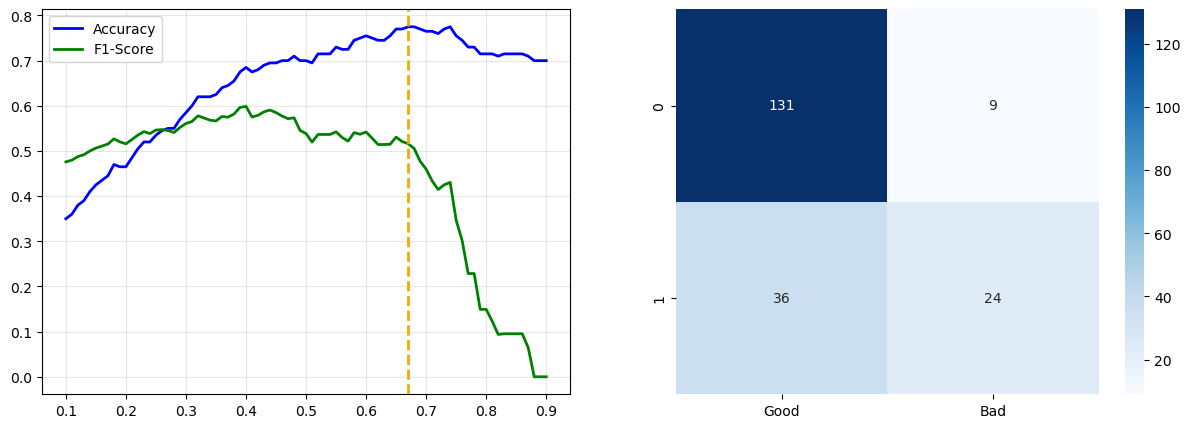

In [ ]:
# Threshold optimization for ensemble predictions
thresholds = np.linspace(0.1, 0.9, 81)
accuracies, f1_scores_list, recalls, precisions = [], [], [], []
for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_ensemble >= thresh).astype(int)
    accuracies.append(accuracy_score(y_test_new, y_pred_thresh))
    f1_scores_list.append(f1_score(y_test_new, y_pred_thresh))
    recalls.append(recall_score(y_test_new, y_pred_thresh))
    precisions.append(precision_score(y_test_new, y_pred_thresh))

# Find optimal threshold based on accuracy
optimal_idx = np.argmax(accuracies)
optimal_threshold, optimal_accuracy, optimal_f1 = thresholds[optimal_idx], accuracies[optimal_idx], f1_scores_list[optimal_idx]
optimal_recall, optimal_precision = recalls[optimal_idx], precisions[optimal_idx]

# Get optimized predictions
y_pred_ensemble_optimized = (y_pred_proba_ensemble >= optimal_threshold).astype(int)

# Plot accuracy and F1-score vs threshold, and confusion matrix
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(thresholds, accuracies, 'b-', linewidth=2, label='Accuracy')
ax1.plot(thresholds, f1_scores_list, 'g-', linewidth=2, label='F1-Score')
ax1.axvline(optimal_threshold, color='orange', linestyle='--', linewidth=2)
ax1.legend()
ax1.grid(alpha=0.3)

cm = confusion_matrix(y_test_new, y_pred_ensemble_optimized)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax2, xticklabels=['Good', 'Bad'])
plt.show()

In [ ]:
# Train individual models for comparison
model_lr_ensemble.fit(X_train_new, y_train_new)
model_dt_ensemble.fit(X_train_new, y_train_new)
model_rf_ensemble.fit(X_train_new, y_train_new)
model_xgb_ensemble.fit(X_train_new, y_train_new)

# Get predictions and probabilities for each model
models = [('LR', model_lr_ensemble.predict(X_test_new), model_lr_ensemble.predict_proba(X_test_new)[:, 1]),
          ('DT', model_dt_ensemble.predict(X_test_new), model_dt_ensemble.predict_proba(X_test_new)[:, 1]),
          ('RF', model_rf_ensemble.predict(X_test_new), model_rf_ensemble.predict_proba(X_test_new)[:, 1]),
          ('XGB', model_xgb_ensemble.predict(X_test_new), model_xgb_ensemble.predict_proba(X_test_new)[:, 1])]

# Build comparison table
comparison_results = [{'Model': name, 'Accuracy': accuracy_score(y_test_new, pred), 'F1-Score': f1_score(y_test_new, pred), 'Recall': recall_score(y_test_new, pred), 'Precision': precision_score(y_test_new, pred), 'AUC-ROC': roc_auc_score(y_test_new, proba)} for name, pred, proba in models]
comparison_results += [{'Model': ' ENSEMBLE (opt)', 'Accuracy': optimal_accuracy, 'F1-Score': optimal_f1, 'Recall': optimal_recall, 'Precision': optimal_precision, 'AUC-ROC': auc_default}]

# Convert to DataFrame and print
comparison_df = pd.DataFrame(comparison_results).set_index('Model')
print(comparison_df)


                 Accuracy  F1-Score    Recall  Precision   AUC-ROC
Model                                                             
LR                  0.675  0.539007  0.633333   0.469136  0.742619
DT                  0.610  0.556818  0.816667   0.422414  0.693690
RF                  0.690  0.544118  0.616667   0.486842  0.756548
XGB                 0.715  0.528926  0.533333   0.524590  0.767738
 ENSEMBLE (opt)     0.775  0.516129  0.400000   0.727273  0.773571


## 5. Feature Importance Analysis

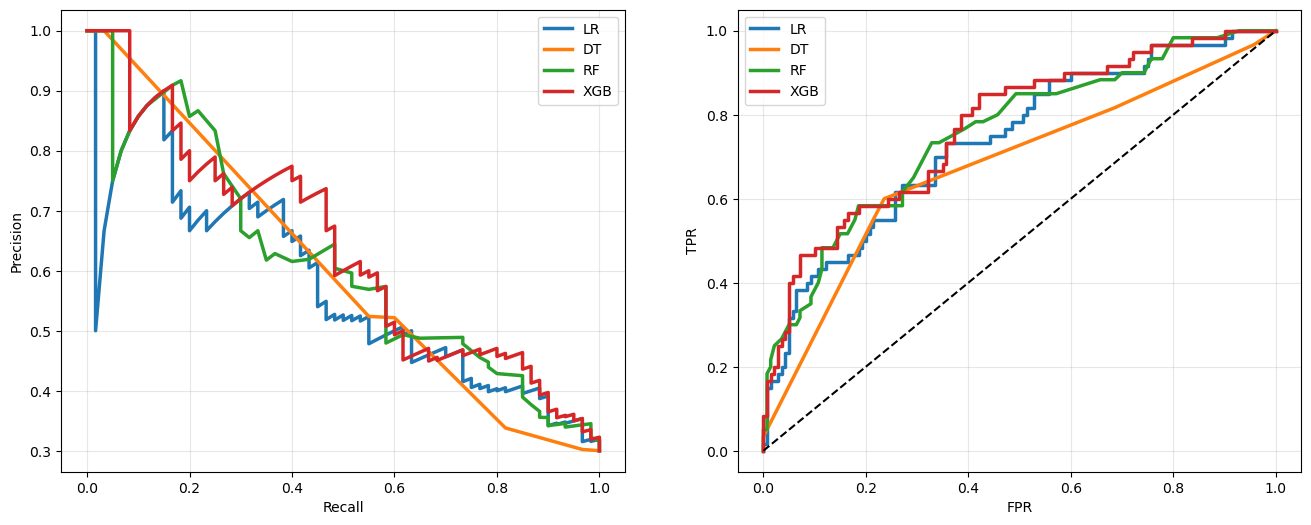

In [ ]:
# Precision-Recall and ROC curves for all models
models_pr = {'LR': y_pred_proba_lr, 'DT': y_pred_proba_dt, 'RF': y_pred_proba_rf, 'XGB': y_pred_proba}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for name, y_proba in models_pr.items():
    p, r, _ = precision_recall_curve(y_test_final, y_proba)
    ax1.plot(r, p, linewidth=2.5, label=f'{name}')
    fpr, tpr, _ = roc_curve(y_test_final, y_proba)
    ax2.plot(fpr, tpr, linewidth=2.5, label=f'{name}')
ax1.set_xlabel('Recall'), ax1.set_ylabel('Precision'), ax1.grid(alpha=0.3)
ax2.plot([0, 1], [0, 1], 'k--', linewidth=1.5), ax2.set_xlabel('FPR'), ax2.set_ylabel('TPR'), ax2.grid(alpha=0.3)
ax1.legend(), ax2.legend()
plt.show()

# Calculate minority class metrics for each model
minority_metrics = []
for name, y_proba in models_pr.items():
    y_pred_model = (y_proba >= 0.5).astype(int)
    p, r, f, _ = precision_recall_fscore_support(y_test_final, y_pred_model, average=None)
    minority_metrics.append({'Model': name, 'Recall': r[1], 'Precision': p[1], 'F1': f[1], 'AP': average_precision_score(y_test_final, y_proba), 'AUC': roc_auc_score(y_test_final, y_proba)})

# Build DataFrame for minority metrics
minority_df = pd.DataFrame(minority_metrics).set_index('Model').sort_values('Recall', ascending=False)

## 6.1. Enhanced Model Evaluation - Precision-Recall Analysis

**Focus on Minority Class (Bad Credit) Performance**

For credit scoring, missing a bad debtor is much more expensive than rejecting a good customer. Therefore, we focus on **Recall for Class 1 (Bad Credit)** and use Precision-Recall curves.

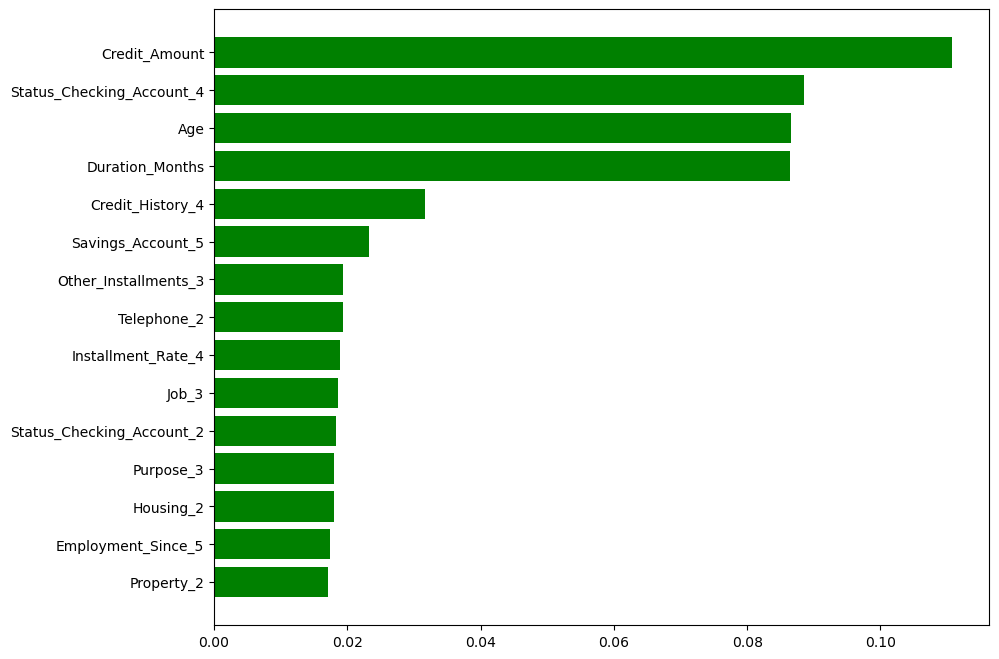

In [ ]:
# Feature importance for Random Forest
feature_names = X_train_final.columns.tolist()
rf_importance = pd.DataFrame({'Feature': feature_names, 'Importance': rf_model.feature_importances_}).sort_values('Importance', ascending=False)

# Plot top 15 features
fig, ax = plt.subplots(figsize=(10, 8))
top = rf_importance.head(15)
ax.barh(range(len(top)), top['Importance'].values, color='green')
ax.set_yticks(range(len(top)))
ax.set_yticklabels(top['Feature'].values)
ax.invert_yaxis()
plt.show()

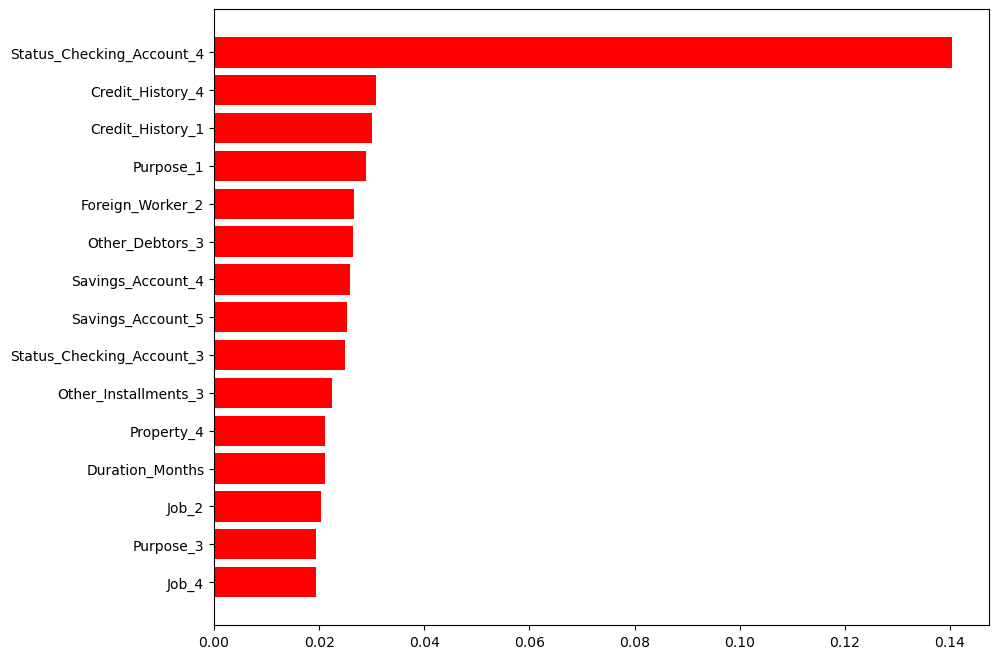

In [ ]:
# Feature importance for XGBoost
xgb_importance = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_model.feature_importances_}).sort_values('Importance', ascending=False)

# Plot top 15 features
fig, ax = plt.subplots(figsize=(10, 8))
top = xgb_importance.head(15)
ax.barh(range(len(top)), top['Importance'].values, color='red')
ax.set_yticks(range(len(top)))
ax.set_yticklabels(top['Feature'].values)
ax.invert_yaxis()
plt.show()

## 8. Cost-Sensitive Optimization and Threshold Tuning

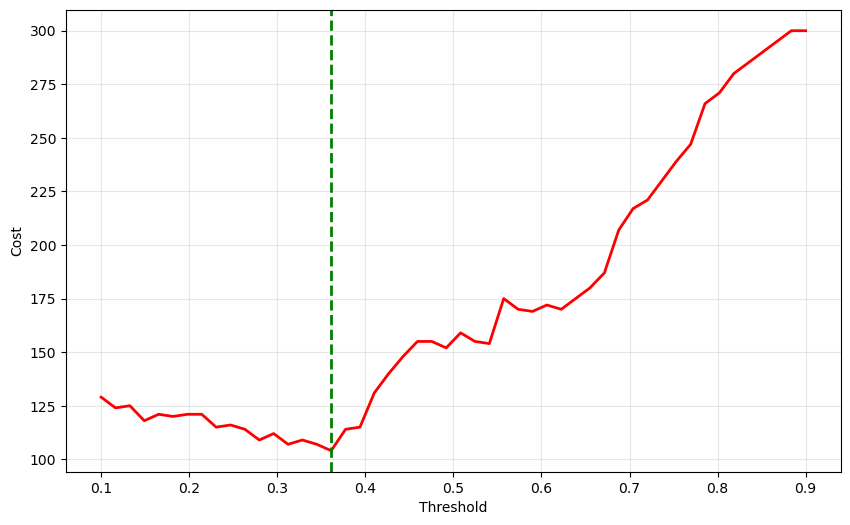

In [ ]:
# Define costs for false negatives and false positives
cost_fn, cost_fp = 5, 1

# Function to calculate total misclassification cost
def calculate_total_cost(y_true, y_pred_proba, threshold, cost_fn=5, cost_fp=1):
    y_pred = (y_pred_proba >= threshold).astype(int)
    fp = ((y_true == 0) & (y_pred == 1)).sum()
    fn = ((y_true == 1) & (y_pred == 0)).sum()
    return (fn * cost_fn) + (fp * cost_fp)

# Test different thresholds for cost optimization
thresholds_cost = np.linspace(0.1, 0.9, 50)
costs_xgb = [calculate_total_cost(y_test_final, y_pred_proba, t, cost_fn, cost_fp) for t in thresholds_cost]

# Find optimal threshold with minimum cost
optimal_threshold_xgb = thresholds_cost[np.argmin(costs_xgb)]

# Plot cost vs threshold
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(thresholds_cost, costs_xgb, 'r-', linewidth=2)
ax.axvline(optimal_threshold_xgb, color='green', linestyle='--', linewidth=2)
ax.set_xlabel('Threshold'), ax.set_ylabel('Cost'), ax.grid(alpha=0.3)
plt.show()

# Get predictions at optimal threshold
y_pred_xgb_optimized = (y_pred_proba >= optimal_threshold_xgb).astype(int)

In [ ]:
# Print final results and best model
print("="*60)
print("FINAL MODEL RESULTS")
print("="*60)
print(comparison_df.round(4).to_string())
print("="*60)
best_model = comparison_df['Accuracy'].idxmax()
print(f"Best: {best_model} | Acc: {comparison_df.loc[best_model, 'Accuracy']*100:.2f}% | F1: {comparison_df.loc[best_model, 'F1-Score']:.4f} | AUC: {comparison_df.loc[best_model, 'AUC-ROC']:.4f}")

FINAL MODEL RESULTS
                 Accuracy  F1-Score  Recall  Precision  AUC-ROC
Model                                                          
LR                  0.675    0.5390  0.6333     0.4691   0.7426
DT                  0.610    0.5568  0.8167     0.4224   0.6937
RF                  0.690    0.5441  0.6167     0.4868   0.7565
XGB                 0.715    0.5289  0.5333     0.5246   0.7677
 ENSEMBLE (opt)     0.775    0.5161  0.4000     0.7273   0.7736
Best:  ENSEMBLE (opt) | Acc: 77.50% | F1: 0.5161 | AUC: 0.7736
